In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
# Versions of libraries
import sklearn
print(f'Numpy:{np.__version__}\nSklearn:{sklearn.__version__}')

Numpy:1.19.5
Sklearn:0.22.2.post1


In [3]:
#Load the dataset
df = pd.read_csv('drive/MyDrive/DataMining/healthcare-dataset-stroke-data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Replace 'Unknown' values from feature smoking status as NaN value
df['smoking_status'].replace('Unknown', np.NaN, inplace=True)
# df.head()

In [5]:
df.shape

(5110, 12)

In [6]:
#Remove Columns with missing values (bmi and smoking_status)
df1 = df.dropna(axis=1)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,1


In [7]:
#We droped 2 columns
df1.shape

(5110, 10)

In [8]:
# Calculata bmi mean
bmi_mean = df['bmi'].mean()
bmi_mean

28.893236911794673

In [9]:
# Replace bmi missing values with column mean
df2 = df.copy()
df2.bmi = df2['bmi'].fillna(value= bmi_mean)
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [10]:
#Create dataframe withnout smoking status, stroke columns
df3_training = df.drop(columns=['smoking_status','stroke']).dropna(axis=0)
df3_training.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0


In [11]:
df3_training.shape

(4909, 10)

In [12]:
#Get Dummy variables. Drop first column to avoid multicollinearity
df3_training_dummies = pd.get_dummies(df3_training,drop_first=True).drop(['id'], axis=1)
df3_training_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0
5,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1


In [13]:
# Calculate correlation matrix
df3_dummies_corr = pd.get_dummies(data=df3_training_dummies).corr()
# df3_dummies_corr.head()

In [14]:
# Absolute value sort of bmi correlation values
bmi_corr_sorted = df3_dummies_corr[['bmi']].sort_values(by='bmi', key=abs,ascending=False)
bmi_corr_sorted

,bmi
bmi,1.000000
work_type_children,-0.448674
ever_married_Yes,0.341695
age,0.333398
work_type_Private,0.208029
avg_glucose_level,0.175502
hypertension,0.167811
work_type_Self-employed,0.072701
heart_disease,0.041357
work_type_Never_worked,-0.028602


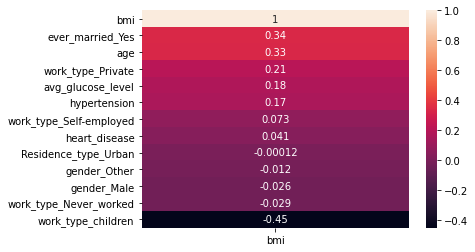

In [15]:
# Plot bmi correlation values
bmi_corr = df3_dummies_corr[['bmi']].sort_values(by=['bmi'], ascending= False)
sns.heatmap(bmi_corr, annot=True)

In [16]:
# List of the values that have the most correlation with bmi
bmi_correlated_features = ['bmi','ever_married_Yes','age','work_type_Private','avg_glucose_level','hypertension','work_type_children']

In [17]:
# Create numeric representation of the categorical data
df3_training_dummies = df3_training_dummies[bmi_correlated_features]
df3_training_dummies.head()

,bmi,ever_married_Yes,age,work_type_Private,avg_glucose_level,hypertension,work_type_children
0,36.6,1,67.0,1,228.69,0,0
2,32.5,1,80.0,1,105.92,0,0
3,34.4,1,49.0,1,171.23,0,0
4,24.0,1,79.0,0,174.12,1,0
5,29.0,1,81.0,1,186.21,0,0


In [18]:
X = df3_training_dummies.drop(columns=['bmi']).values
X.shape

(4909, 6)

In [19]:
X

array([[  1.  ,  67.  ,   1.  , 228.69,   0.  ,   0.  ],
       [  1.  ,  80.  ,   1.  , 105.92,   0.  ,   0.  ],
       [  1.  ,  49.  ,   1.  , 171.23,   0.  ,   0.  ],
       ...,
       [  1.  ,  35.  ,   0.  ,  82.99,   0.  ,   0.  ],
       [  1.  ,  51.  ,   1.  , 166.29,   0.  ,   0.  ],
       [  1.  ,  44.  ,   0.  ,  85.28,   0.  ,   0.  ]])

In [20]:
y = df3_training_dummies['bmi'].values
y

array([36.6, 32.5, 34.4, ..., 30.6, 25.6, 26.2])

In [21]:
y.size

4909

In [22]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [23]:
#Fitting the test Linear Regression model based on 75% of the bmi data
test_model = LinearRegression().fit(X_train, y_train)

In [24]:
# Calculate predictions
y_pred = test_model.predict (X_test)

In [25]:
#Evaluating the test model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.2118155586410175
Root Mean Squared Error: 7.084010314801309


In [26]:
print(f"Bmi range: {df.bmi.min()} - {df.bmi.max()}")

Bmi range: 10.3 - 97.6


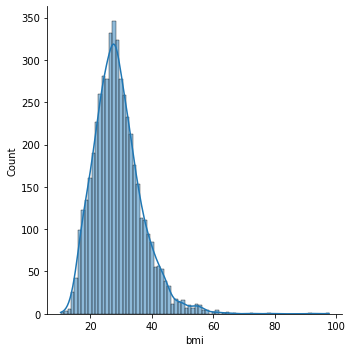

In [27]:
sns.displot(df['bmi'], kde=True)


In [28]:
#Fitting the Linear Regression model basen on all the data
model = LinearRegression().fit(X, y)

In [29]:
#Keeping the indeces of the records with bmi missing values
bmi_missing_df = df[df['bmi'].isnull()]
bmi_missing_indeces = df[df['bmi'].isnull()].index
bmi_missing_indeces

Int64Index([   1,    8,   13,   19,   27,   29,   43,   46,   50,   51,
            ...
            4790, 4921, 4934, 4949, 4984, 5039, 5048, 5093, 5099, 5105],
           dtype='int64', length=201)

In [30]:
bmi_missing_indeces.shape

(201,)

In [31]:
# df3_application_dummies = pd.get_dummies(bmi_missing_df,drop_first=True).drop(['id','bmi'], axis=1)
# df3_application_dummies.head()

In [33]:
# Create the prediction dataset
df3_application_dummies = df.iloc[bmi_missing_indeces]
df3_application_dummies = pd.get_dummies(df3_application_dummies,drop_first=True).drop(['id'], axis=1)
df3_application_dummies = df3_application_dummies[bmi_correlated_features]
df3_application_dummies

,bmi,ever_married_Yes,age,work_type_Private,avg_glucose_level,hypertension,work_type_children
1,NaN,1,61.0,0,202.21,0,0
8,NaN,1,59.0,1,76.15,0,0
13,NaN,1,78.0,1,219.84,0,0
19,NaN,0,57.0,0,217.08,0,0
27,NaN,1,58.0,1,189.84,0,0
...,...,...,...,...,...,...,...
5039,NaN,0,41.0,1,70.15,0,0
5048,NaN,1,40.0,1,191.15,0,0
5093,NaN,1,45.0,0,95.02,1,0
5099,NaN,1,40.0,1,83.94,0,0


In [34]:
df3_application_dummies.shape

(201, 7)

In [35]:
X_apply = df3_application_dummies.drop(columns='bmi').values
# X_apply

In [36]:
X_apply.shape

(201, 6)

In [37]:
predicted_bmi = model.predict (X_apply)
# predicted_bmi

In [38]:
predicted_bmi.shape

(201,)

In [39]:
# Start making final df3
df3 = df.drop(columns='smoking_status')
df3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0


In [ ]:
#Fill the missing values if bmi with the predicted ones
df3['bmi'].iloc[bmi_missing_indeces] = predicted_bmi

In [41]:
df3.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.039143,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,1


In [43]:
#Ensure there are no null values in bmi column
print(f"Number of null values in bmi column:{df3['bmi'].isnull().sum(axis = 0)}")

Number of null values in bmi column:0


In [44]:
df4_training = df.drop(labels=['id','stroke','bmi'], axis=1)
df4_training.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked


In [45]:
#Keep the indeces of records with NaN on smoking_status
smoking_status_missing_df = df[df['smoking_status'].isnull()]
smoking_status_missing_indeces = df[df['smoking_status'].isnull()].index
smoking_status_missing_indeces

Int64Index([   8,    9,   13,   19,   23,   27,   31,   38,   46,   50,
            ...
            5088, 5089, 5094, 5095, 5097, 5098, 5101, 5103, 5104, 5109],
           dtype='int64', length=1544)

In [46]:
#Drop the rows with NaN values on the smoking_status feature
df4_training.dropna(subset=['smoking_status'], axis=0, inplace=True)
# df4_training

In [47]:
# Label encode smoking status
smoking_encoded = df4_training['smoking_status'].str.replace('never smoked','0')
smoking_encoded = smoking_encoded.str.replace('formerly smoked',' 1')
smoking_encoded = smoking_encoded.str.replace('smokes',' 2')
df4_training['smoking_status'] = smoking_encoded
df4_training['smoking_status'] = df4_training['smoking_status'].astype(int)

In [48]:
#Get the one hot encoded dataset
df4_training_dummies = pd.get_dummies(df4_training.drop(labels=['smoking_status'], axis=1), drop_first=True)
df4_training_dummies['smoking_status'] = df4_training['smoking_status']
df4_training_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status
0,67.0,0,1,228.69,1,0,1,0,1,0,0,1,1
1,61.0,0,0,202.21,0,0,1,0,0,1,0,0,0
2,80.0,0,1,105.92,1,0,1,0,1,0,0,0,0
3,49.0,0,0,171.23,0,0,1,0,1,0,0,1,2
4,79.0,1,0,174.12,0,0,1,0,0,1,0,0,0


In [49]:
#Calculate correlation of smoking_status to other features
df4_dummies_corr = pd.get_dummies(data=df4_training_dummies).corr()
smoking_status_corr_sorted = df4_dummies_corr[['smoking_status']].sort_values(by='smoking_status', key=abs,ascending=False)
# smoking_status_corr_sorted

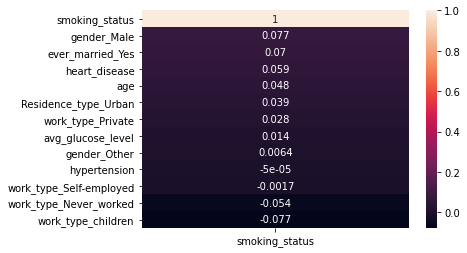

In [50]:
#Plotting smoking_status correlation
smoking_status_corr = df4_dummies_corr[['smoking_status']].sort_values(by=['smoking_status'], ascending= False)
sns.heatmap(smoking_status_corr, annot=True)

In [51]:
#Training array
X = df4_training_dummies.drop(columns=['smoking_status']).values
X.shape

(3566, 12)

In [52]:
#Prediction vector
y = df4_training_dummies['smoking_status'].values
y.shape

(3566,)

In [53]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

Maximum:- 0.5134529147982063 at K = 86


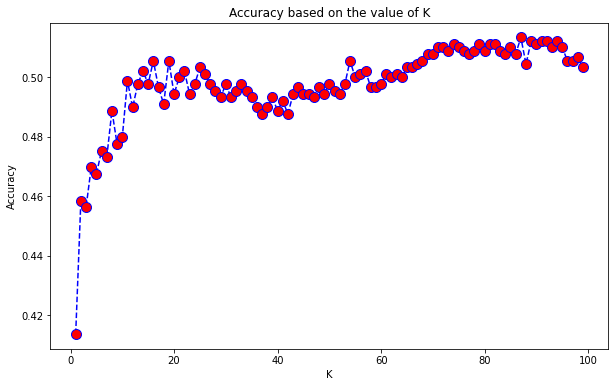

In [54]:
#Find the best value of K
accuracy = []
for i in range(1,100):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 accuracy.append(np.mean(pred_i == y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),accuracy,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy based on the value of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum:-",max(accuracy),"at K =",accuracy.index(max(accuracy)))

In [55]:
knn_test = KNeighborsClassifier(n_neighbors=86,
                                # p=7,
                                # algorithm='kd_tree',
                                metric='minkowski' 
                                )
knn_test.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=86, p=2,
                     weights='uniform')

In [56]:
y_pred = knn_test.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.507847533632287


In [58]:
#Fitting the final smoking_status filling model
knn_apply = KNeighborsClassifier(n_neighbors=86, p=7,weights='uniform',algorithm='kd_tree', metric='minkowski' )
knn_apply.fit(X, y)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=86, p=7,
                     weights='uniform')

In [59]:
#Creating the final smoking_status training dataframe
df4_application_dummies = df.drop(labels=['id','stroke','bmi'], axis=1)
df4_application_dummies = pd.get_dummies(df4_application_dummies.drop(labels=['smoking_status'], axis=1), drop_first=True)
df4_application_dummies = df4_application_dummies.iloc[smoking_status_missing_indeces,:]
df4_application_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
8,59.0,0,0,76.15,0,0,1,0,1,0,0,0
9,78.0,0,0,58.57,0,0,1,0,1,0,0,1
13,78.0,0,1,219.84,1,0,1,0,1,0,0,1
19,57.0,0,1,217.08,1,0,0,0,0,0,0,1
23,82.0,0,1,208.30,1,0,1,0,1,0,0,0


In [60]:
X = df4_application_dummies.values
X.shape

(1544, 12)

In [61]:
# Predict smoking status
smoking_status_prediction = knn_apply.predict(X)
smoking_status_prediction.shape

(1544,)

In [62]:
# Cast integer values to str
smoking_status_prediction = pd.Series(smoking_status_prediction).astype(str)
smoking_status_prediction.values

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [63]:
df4 = df.drop(labels='bmi', axis=1)

In [64]:
#FIll the missing values if smoking_status with the predicted ones
df4['smoking_status'].iloc[smoking_status_missing_indeces] = smoking_status_prediction.values
df4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0


In [65]:
# Decode encoded smoking status labels
smoking_decoded = df4['smoking_status'].str.replace('never smoked','0')
smoking_decoded = smoking_decoded.str.replace('formerly smoked', '1')
smoking_decoded = smoking_decoded.str.replace('smokes', '2')
df4['smoking_status'] = smoking_decoded.astype(int)
df4.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,2,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,0,1


In [66]:
#Ensure there are no null values in bmi column
print(f"Number of null values in bmi column: {df4['smoking_status'].isnull().sum(axis = 0)}")


Number of null values in bmi column: 0


In [67]:
df5 = df.copy()
df5['bmi'] = df3['bmi']
df5['smoking_status'] = df4['smoking_status']
df5.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.039143,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,2,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,0,1


In [68]:
df5['bmi'].isnull().sum(axis = 0)

0

In [69]:
#Save the datasets
df1.to_csv("drive/MyDrive/DataMining/healthcare_processed_datasets/df1.csv")
df2.to_csv("drive/MyDrive/DataMining/healthcare_processed_datasets/df2.csv")
df3.to_csv("drive/MyDrive/DataMining/healthcare_processed_datasets/df3.csv")
df4.to_csv("drive/MyDrive/DataMining/healthcare_processed_datasets/df4.csv")
df5.to_csv("drive/MyDrive/DataMining/healthcare_processed_datasets/df5.csv")